# MultiNomial Naive Bayes
For this Program, I've used the LoadDigits Dataset from SKLearn.

## About this Dataset: 
The data set contains images of hand-written digits: 10 classes where each class refers to a digit. I've compared the Performance of this Dataset with GaussianNB() also, Performance Increase is clearly visible

In [60]:
# Importing the necessary packages
import numpy as np
import pandas as pd

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# for depicting graphs
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [61]:
# loading dataset using the load_digits() by sklearn
digitData = datasets.load_digits()

/Users/briha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

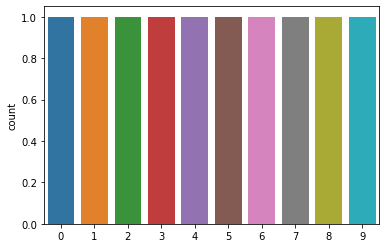

In [62]:
# Plotting a graph with the count and the target_names of the data
sns.countplot(digitData["target_names"])

In [63]:
# printing details such as feature names, targets and classes

print("\nFeatures of the Dataset: ", digitData.feature_names)
print("\nTarget Names of the Dataset: ", digitData.target_names)
print("\nTargets of the Dataset: ", digitData.target)


Features of the Dataset:  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']

Target Names of the Dataset:  [0 1 2 3 4 5 6 7 8 9]

Targets of the Dataset:  [0 1 2 ... 8 9 8]


In [64]:
# shape of the dataset ( # of rows and # of columns)

print(digitData.data.shape)

(1797, 64)


In [65]:
# printing the first 5 records of the dataset

print(digitData.data[0:5])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

In [66]:
# splitting the dataset into training and testing
# testing is 0.33, then training is 1-0.33 which is 0.67

xTrain, xTest, yTrain, yTest = train_test_split(digitData.data, digitData.target, test_size=0.4, random_state=800)

In [77]:
def GaussianPrediction(xtrain, xtest, ytrain, ytest):
    # creating the gaussian model for comparison
    GaussianModel = GaussianNB()
    # fitting the model with i/p
    GaussianModel.fit(xtrain, ytrain)
    # predicting the o/p for test dataa
    y_prediction = GaussianModel.predict(xtest)
    # printing accuracy
    print("Accuracy of GaussianNB: ", accuracy_score(ytest, y_prediction))
    # printing conf matrix using matplotlib
    ConfusionMatrix = metrics.confusion_matrix(ytest, y_prediction)
    plt.imshow(ConfusionMatrix, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title("Confusion Matrix")
    plt.colorbar()

    fmt = 'd'
    threshold = ConfusionMatrix.max() / 2.
    for i, j in itertools.product(range(ConfusionMatrix.shape[0]), range(ConfusionMatrix.shape[1])):
        plt.text(j, i, format(ConfusionMatrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if ConfusionMatrix[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    # printing classification performance report
    print("\n\n",classification_report(y_prediction,ytest))

In [78]:
def MultiNomialPrediction(xtrain, xtest, ytrain, ytest):
    # creating the main MultinomialNB model
    MultiNomialModel = MultinomialNB()
    # fitting the model with i/p data
    MultiNomialModel.fit(xtrain, ytrain)
    # predicting the o/p for test data
    y_prediction = MultiNomialModel.predict(xtest)
    # printing accuracy
    print("\n\nAccuracy of MultinomialNB: ", accuracy_score(ytest, y_prediction))
    
    # printing conf matrix using matplotlib
    ConfusionMatrix = metrics.confusion_matrix(ytest, y_prediction)
    plt.imshow(ConfusionMatrix, interpolation='nearest', cmap=plt.cm.Reds)
    plt.title("Confusion Matrix")
    plt.colorbar()

    fmt = 'd'
    threshold = ConfusionMatrix.max() / 2.
    for i, j in itertools.product(range(ConfusionMatrix.shape[0]), range(ConfusionMatrix.shape[1])):
        plt.text(j, i, format(ConfusionMatrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if ConfusionMatrix[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    # printing classification performance report
    print("\n\n",classification_report(y_prediction,ytest))

Accuracy of GaussianNB:  0.8553546592489569


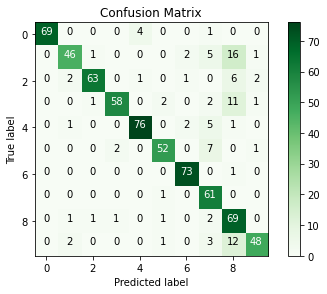



               precision    recall  f1-score   support

           0       0.93      1.00      0.97        69
           1       0.65      0.88      0.75        52
           2       0.84      0.95      0.89        66
           3       0.77      0.95      0.85        61
           4       0.89      0.94      0.92        81
           5       0.84      0.91      0.87        57
           6       0.99      0.94      0.96        78
           7       0.98      0.71      0.82        86
           8       0.92      0.59      0.72       116
           9       0.73      0.91      0.81        53

    accuracy                           0.86       719
   macro avg       0.85      0.88      0.86       719
weighted avg       0.87      0.86      0.85       719

-----------------------------------------


Accuracy of MultinomialNB:  0.9151599443671766


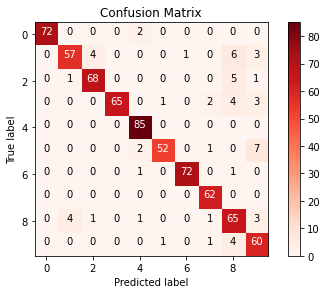



               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       0.80      0.92      0.86        62
           2       0.91      0.93      0.92        73
           3       0.87      1.00      0.93        65
           4       1.00      0.93      0.97        91
           5       0.84      0.96      0.90        54
           6       0.97      0.99      0.98        73
           7       1.00      0.93      0.96        67
           8       0.87      0.76      0.81        85
           9       0.91      0.78      0.84        77

    accuracy                           0.92       719
   macro avg       0.91      0.92      0.91       719
weighted avg       0.92      0.92      0.91       719



In [79]:
GaussianPrediction(xTrain, xTest, yTrain, yTest)
print("-----------------------------------------")
MultiNomialPrediction(xTrain, xTest, yTrain, yTest)